# Importing the necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("darkgrid")
sns.set_palette("Set1")
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

# Reading Data

In [4]:
path_data="Data/train.csv"

data=pd.read_csv(path_data)


In [5]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Domain Analysis

The bank customer churn dataset contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score

<img src="Image/Credit-score-range.jpg" width="316" height="212">



- **Geography:** The country where the customer resides (France, Spain or Germany)
- **Gender:** The customer's gender (Male or Female)
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)
- **IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (1 = yes, 0 = no)


# Basic checks of data and Statistical measure of data

In [6]:
data.shape

(165034, 14)

In [7]:
data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


- There are no constant columns present in the numerical features.

In [10]:
data.describe(include='O')

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


- Similarly, there are no constant columns present in the categorical data.

In [11]:
# Uniqueness
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

id: 165034 distinct values
CustomerId: 23221 distinct values
Surname: 2797 distinct values
CreditScore: 457 distinct values
Geography: 3 distinct values
Gender: 2 distinct values
Age: 71 distinct values
Tenure: 11 distinct values
Balance: 30075 distinct values
NumOfProducts: 4 distinct values
HasCrCard: 2 distinct values
IsActiveMember: 2 distinct values
EstimatedSalary: 55298 distinct values
Exited: 2 distinct values


# Selecting Continuous/Discrete Columns:

In [12]:
# Drop Ignored columns 
ignored_cols = ['id', 'CustomerId', 'Surname']
data.drop(columns=ignored_cols, inplace=True)

In [13]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()


threshold=20 # This means that if a column has 20 or fewer unique values, it is considered discrete.
continuous_cols = [col for col in numerical_cols if data[col].nunique() > threshold]
discrete_cols = [col for col in numerical_cols if data[col].nunique() <= threshold]


# Univariate Analysis 


### Plots Utilized:

**Continuous Features:**
*In this section, I will assess skewness and kurtosis.*

<img src="Image/Skewness and Kurtosis.jpg" width="" height="">

- Histogram with Kernel Density Estimation (KDE):   It combines the benefits of a histogram, which provides a discrete representation of data distribution through bins, and a smoothed estimate of the probability density function using KDE.
    
**Discrete and Categorical Features:**

- Countplot: Utilized to represent the distribution of observations within each categorical bin using bars.


### Continuous Features

In [14]:
num_var=len(continuous_cols)
print(f"Continious Features : {num_var}")

Continious Features : 4


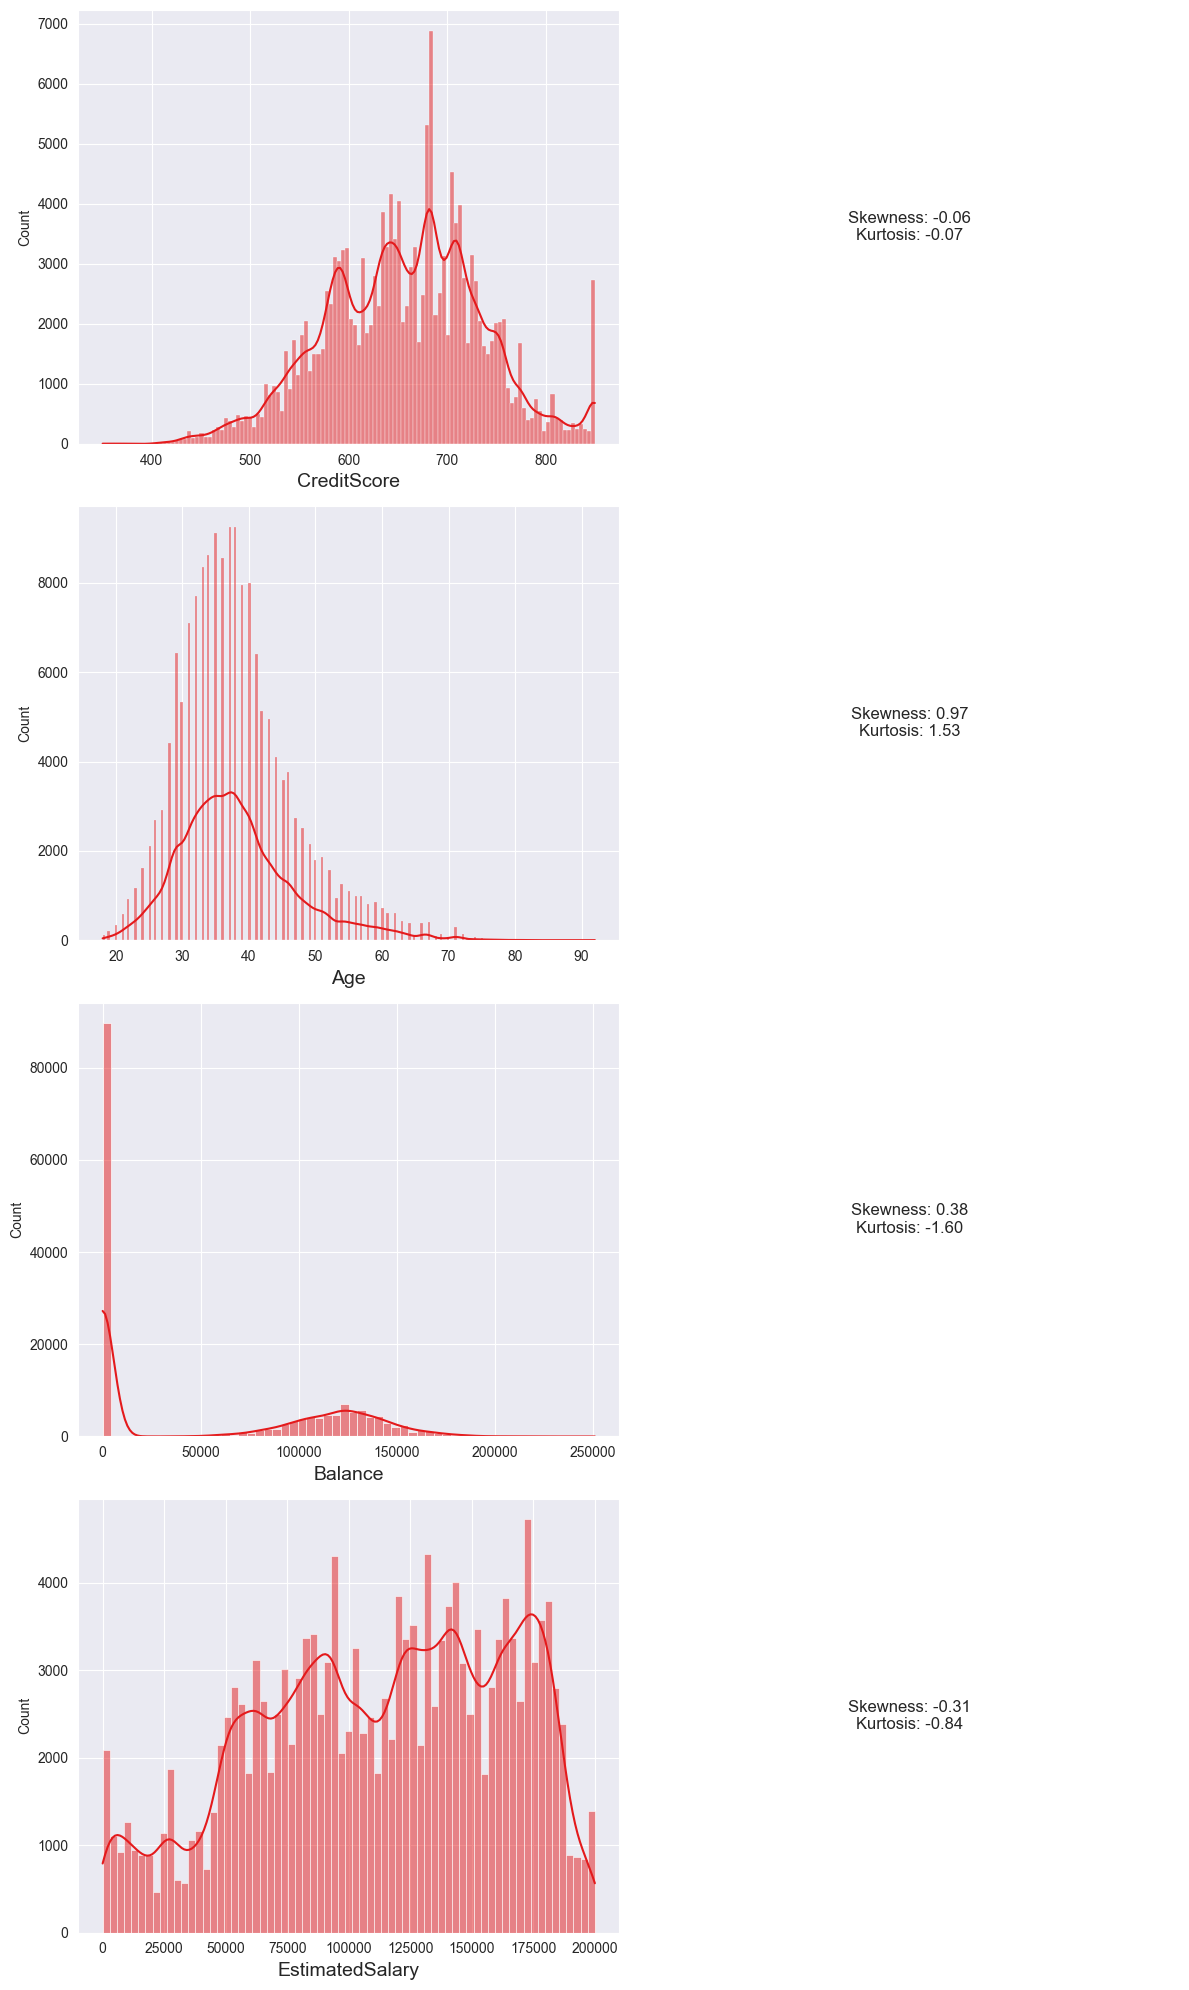

In [15]:
plt.figure(figsize=(12, num_var * 5))  # defining canvas size

i = 1
for cols in continuous_cols:
    # Plotting Histogram
    plt.subplot(num_var, 2, i)
    sns.histplot(x=data[cols],kde=True)
    plt.xlabel(cols, fontsize=14)  # assigning name to x-axis

    # Plotting Skewness and Kurtosis Values
    plt.subplot(num_var, 2, i + 1)
    plt.text(0.5, 0.5, f'Skewness: {data[cols].skew():.2f}\nKurtosis: {data[cols].kurtosis():.2f}',
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')  # Hide axis for the text box

    i += 2

plt.tight_layout()
plt.show()

#### Observations :

##### Credit Score
This image provides a clear visualization of the credit scores.

![Credit Score](Image/Credit-score-range.jpg)

Considering the distribution, it appears that most customers have good credit scores. 

**Should I consider credit score outliers?**

##### Age
The age range spans from 18 to 92, with the majority of customers falling between 32 and 42. However, there are some outliers present in the data.

##### Balance
A zero or positive balance typically indicates no outstanding debts or negative financial obligations, a positive sign for the financial state. Surprisingly, 50% of customers have a zero balance.

##### Estimated Salary
The estimated salaries range between 74,600 and 155,200. While the boxplot doesn't show outliers, it raises a question: 

**Take a look at low salaries! Is that normal for a bank customer?**


#### Skewness : 
- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is between -1 and -0.5 (or between 0.5 and 1), the distribution is moderately skewed.
- If the skewness is less than -1 (or greater than 1), the distribution is significantly skewed.

#### Kurtosis:
    
- kurtosis for normal distribution is equal to 3.
- For a distribution having kurtosis < 3: It is called playkurtic.
- For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

### Discrete and Categorical Features

In [16]:
num_var2=len(discrete_cols)
num_var2

5

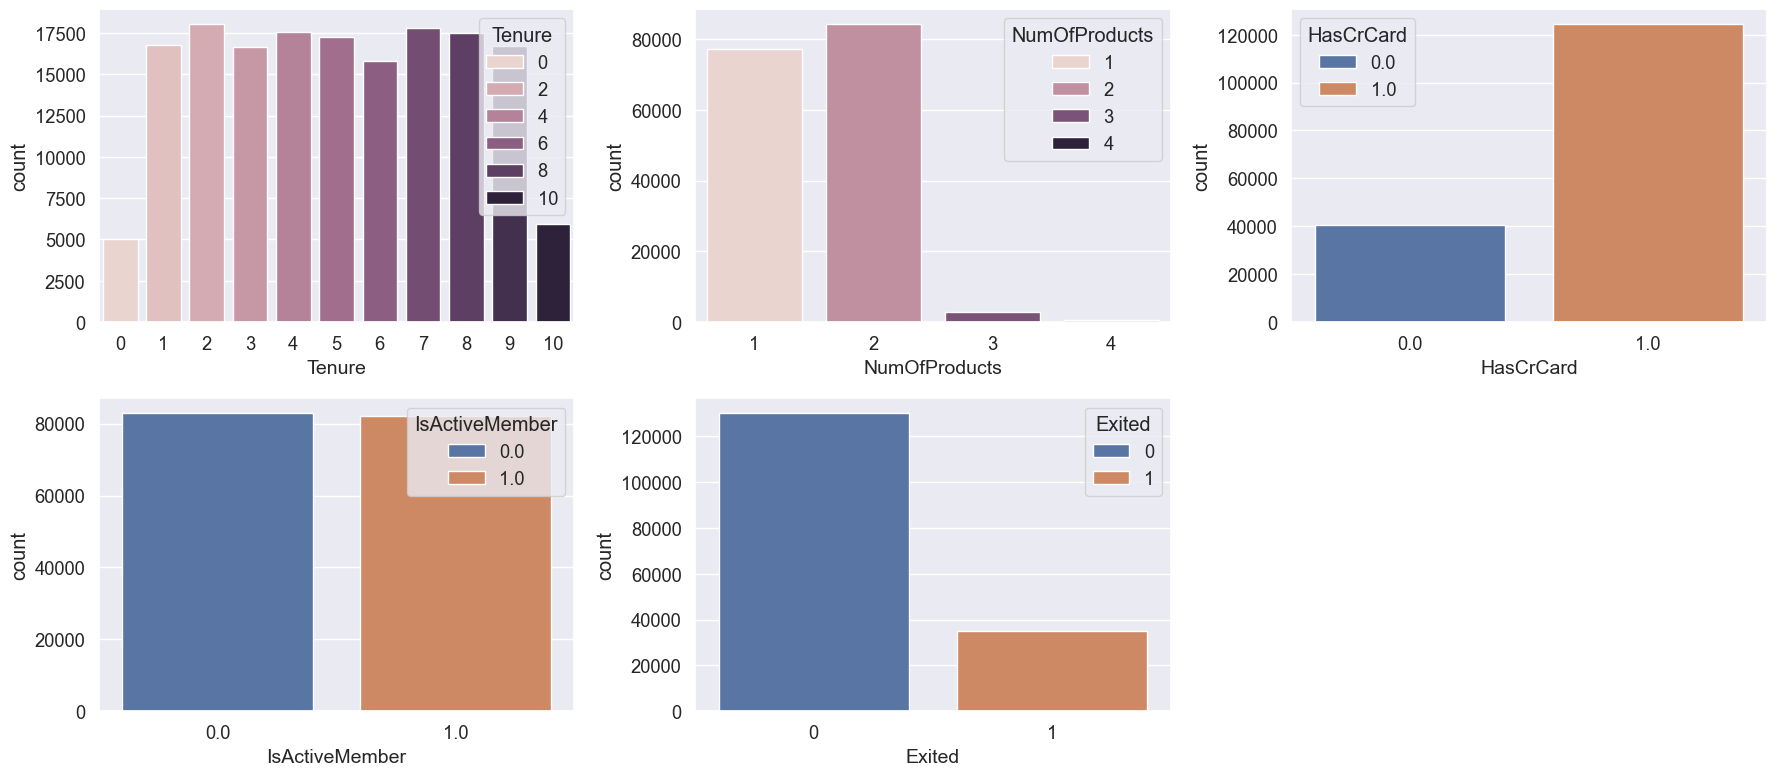

In [36]:
plt.figure(figsize=(18,8)) # defining canvas size
i = 1 # counter

for column in discrete_cols: 
    plt.subplot(2,3,i) # # plotting 5 graphs (2-rows,3-columns) ,i is for count
    sns.countplot(x=data[column],hue=data[column]) 
    plt.xlabel(column,fontsize=14) 
    i+=1 # counter increment

plt.tight_layout()
plt.show() 

#### Observations :
##### Tenure:
The distribution of tenure appears to be symmetrical, with customers typically remaining with the bank for a duration ranging from 1 to 10 years.

##### Num Of Products:
The number of products per customer ranges from 1 to 4. A significant portion of customers holds either 2 or 1 product(s).

##### Has Credit Card:
A majority of customers possess a credit card.

##### Is Active Member:
Approximately half of the customers are considered active members.

##### Exited:
The majority of customers have not exited the bank, indicating a high retention rate. 

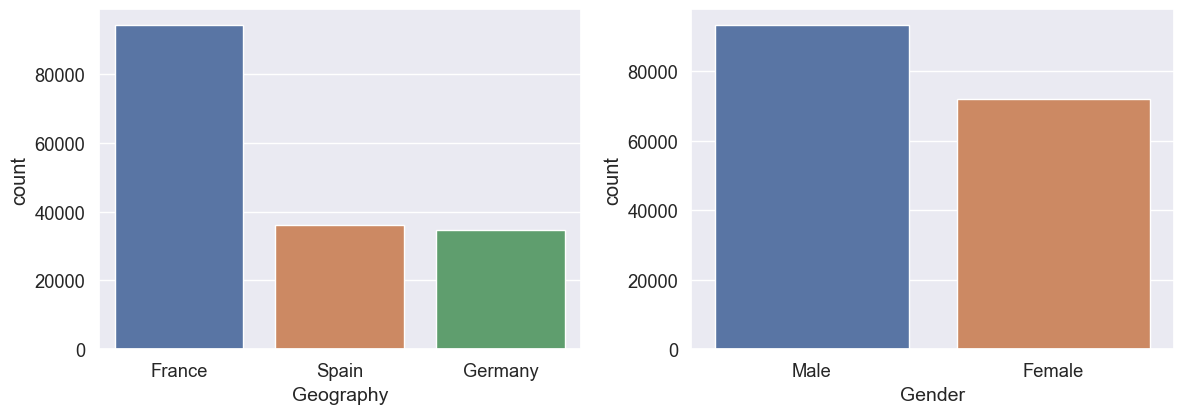

In [35]:
plt.figure(figsize=(18,8)) # defining canvas size
i = 1 # counter

for column in categorical_cols: 
    plt.subplot(2,3,i) # # plotting 5 graphs (2-rows,3-columns) ,i is for count
    sns.countplot(x=data[column],hue=data[column]) 
    plt.xlabel(column,fontsize=14) 
    i+=1 # counter increment

plt.tight_layout()
plt.show() 

#### Observations :
##### Gender:
There is a higher representation of male customers compared to female customers.

##### Geography:
The majority of customers reside in France, making it the predominant country in the dataset.


## Outlier Analysis

In [19]:
len(continuous_cols)

4

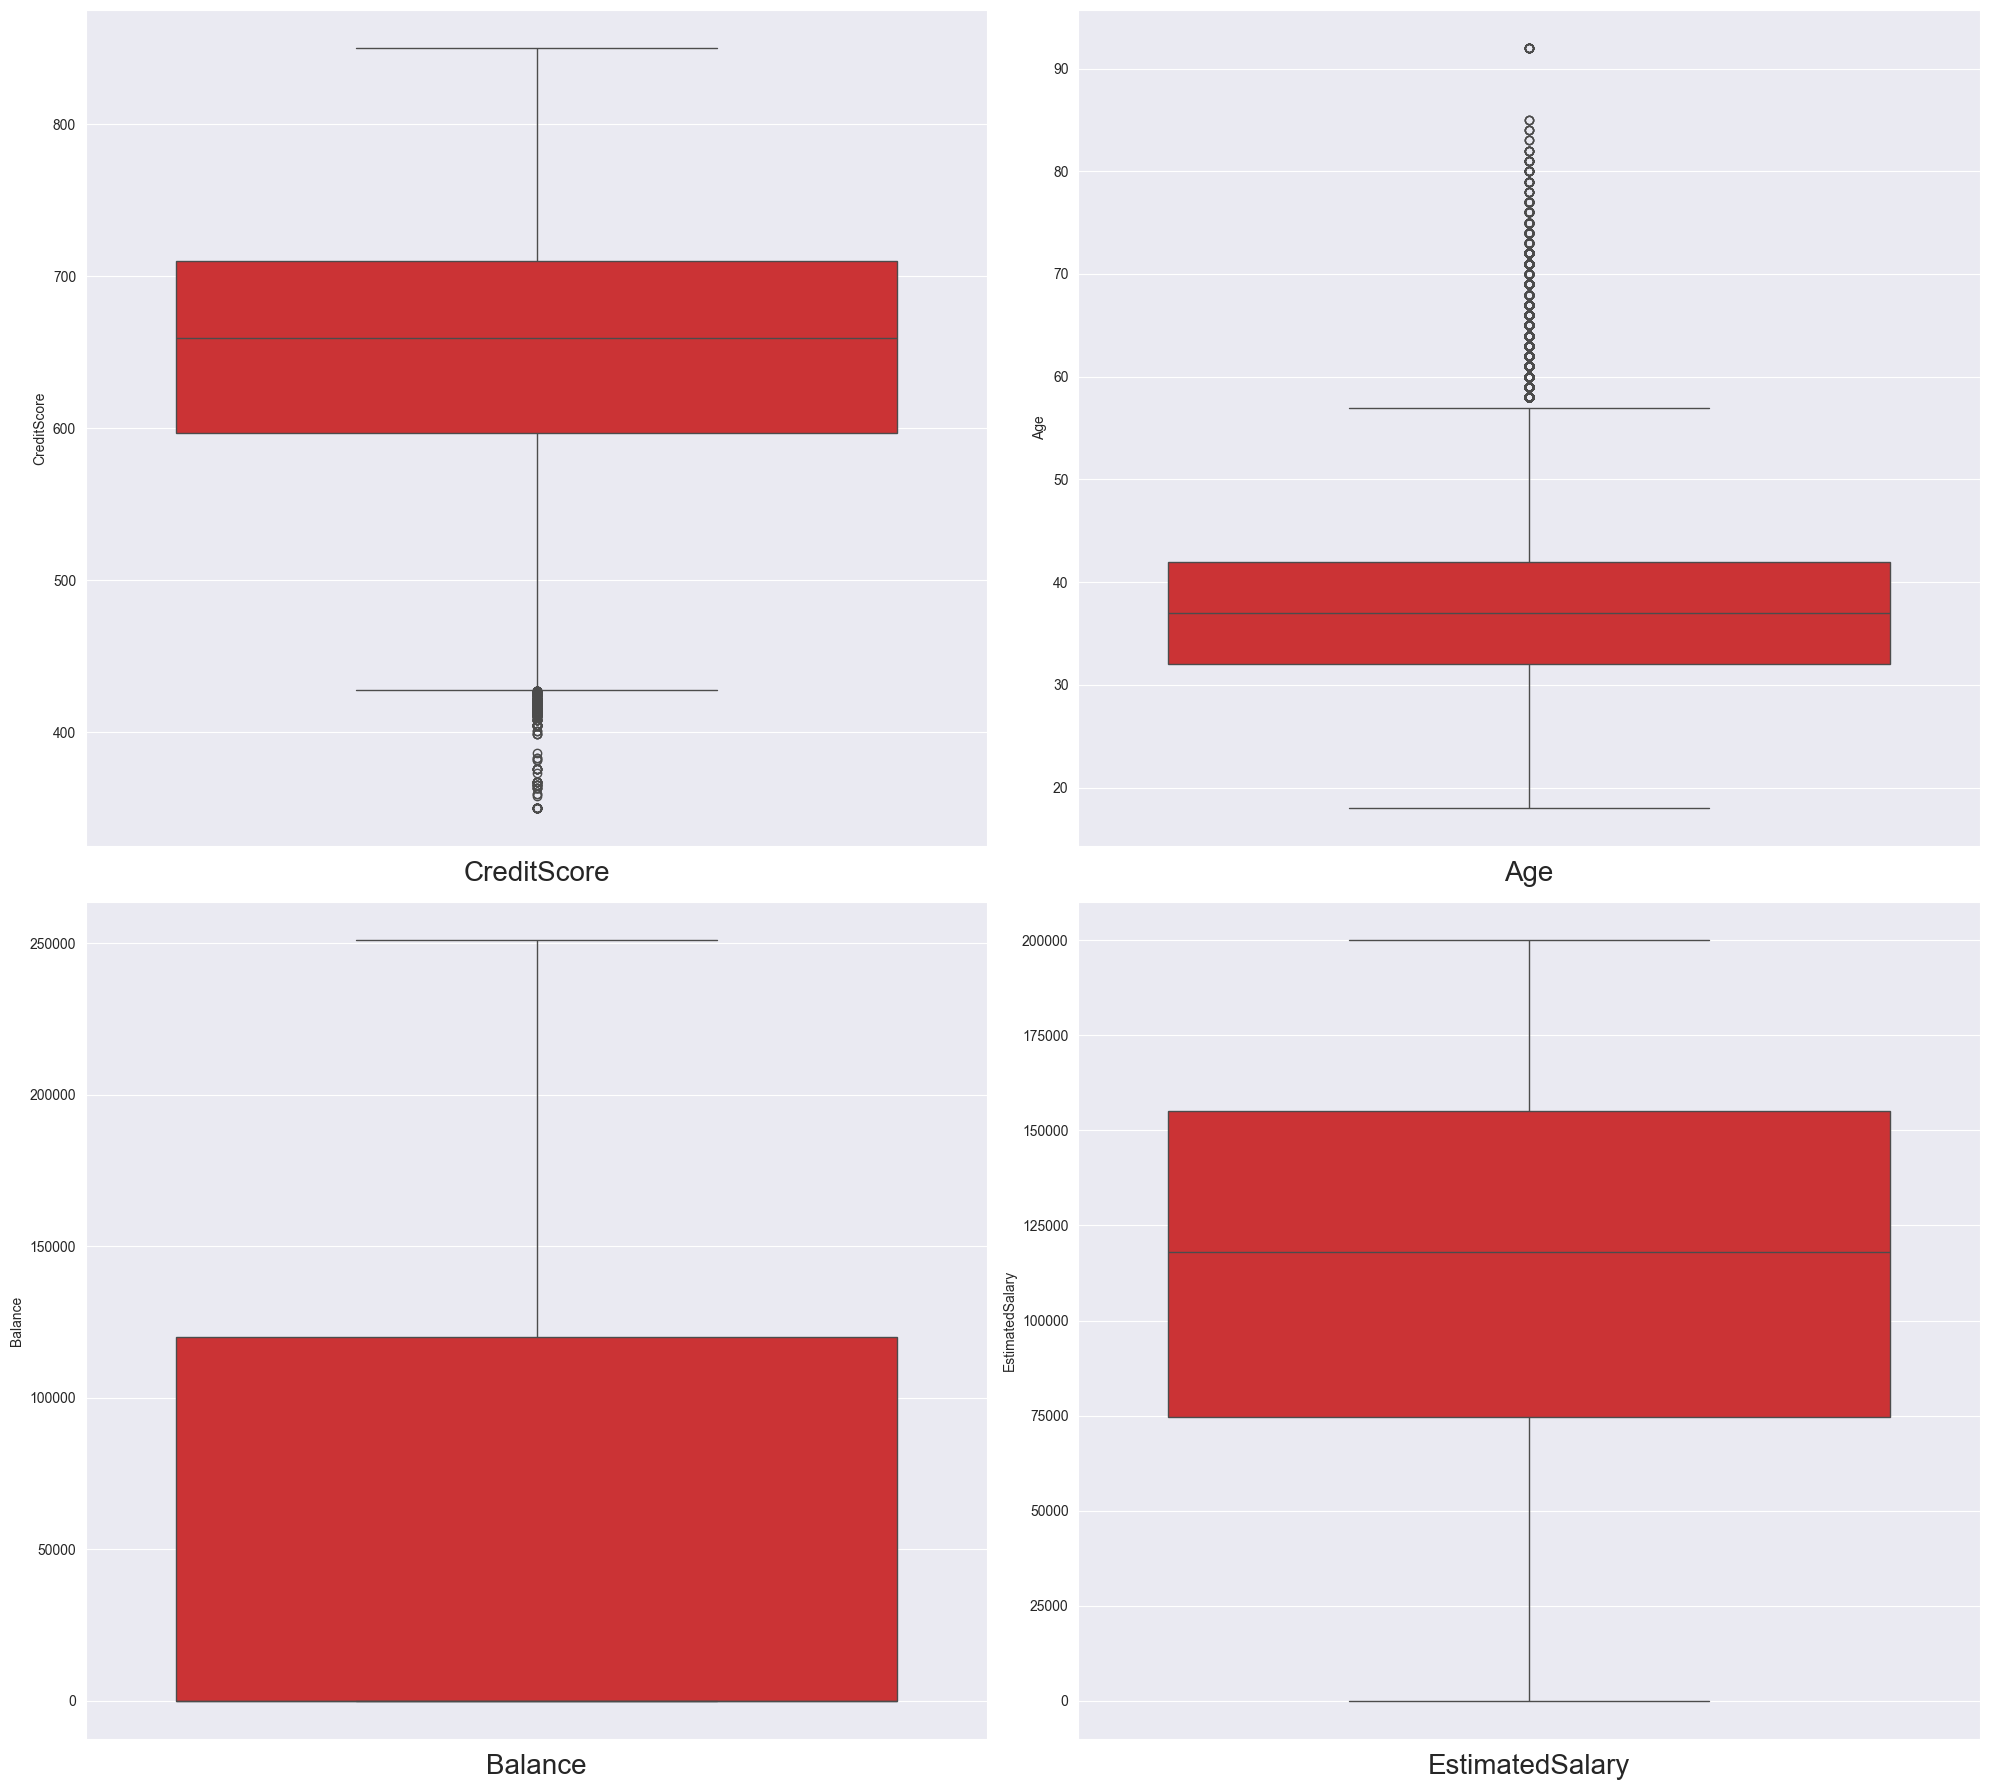

In [20]:
plt.figure(figsize=(20,18)) # defining canvas size
i = 1 # counter

for column in continuous_cols: 

    plt.subplot(2,2,i) 
    sns.boxplot(data[column]) 
    plt.xlabel(column,fontsize=20)
    i+=1 # counter increment

plt.tight_layout()
plt.show() # used to hide the storage loction

# Bivariate Analysis 

In [21]:
g = sns.PairGrid(data[continuous_cols], diag_sharey=False,corner=True)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot)


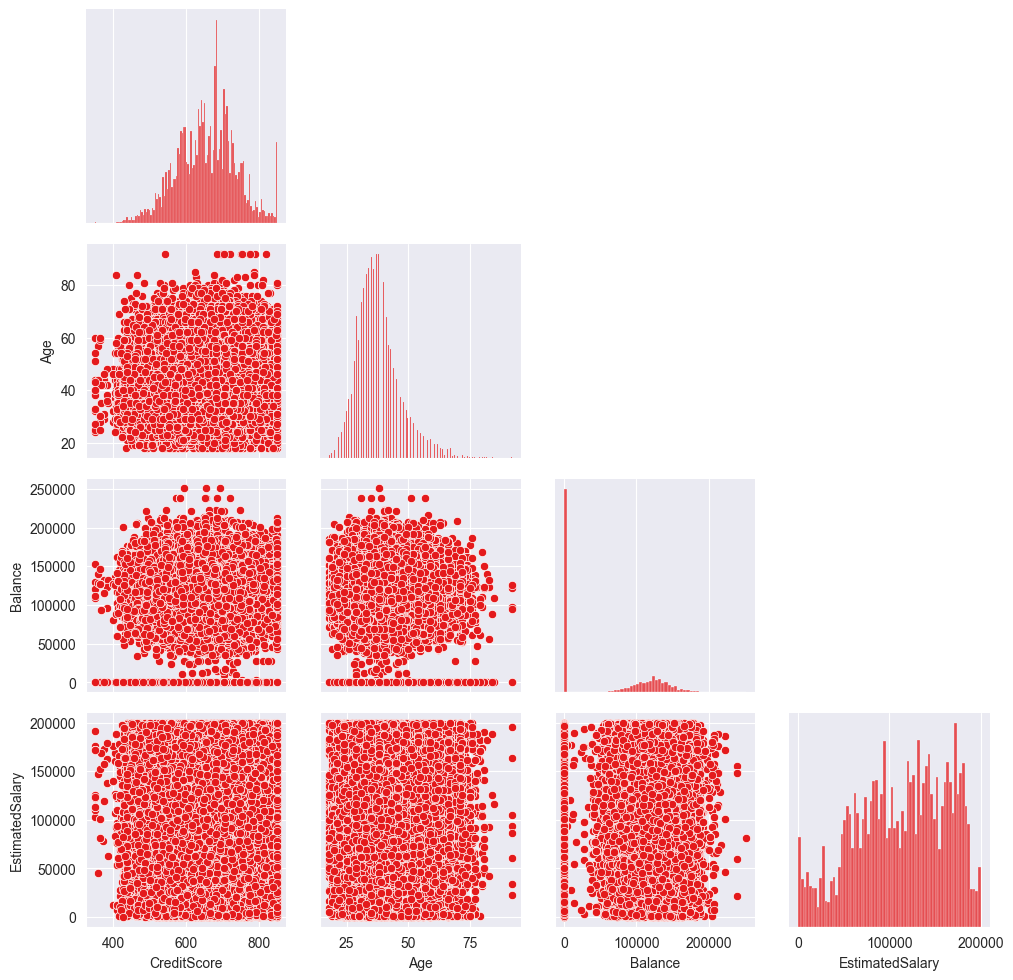

In [22]:
g = sns.PairGrid(data[continuous_cols], diag_sharey=False,corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

* **Exploring the Relationship Between Continuous Features and The Target** 



In [23]:
Target='Exited'

In [24]:
len(continuous_cols)

4

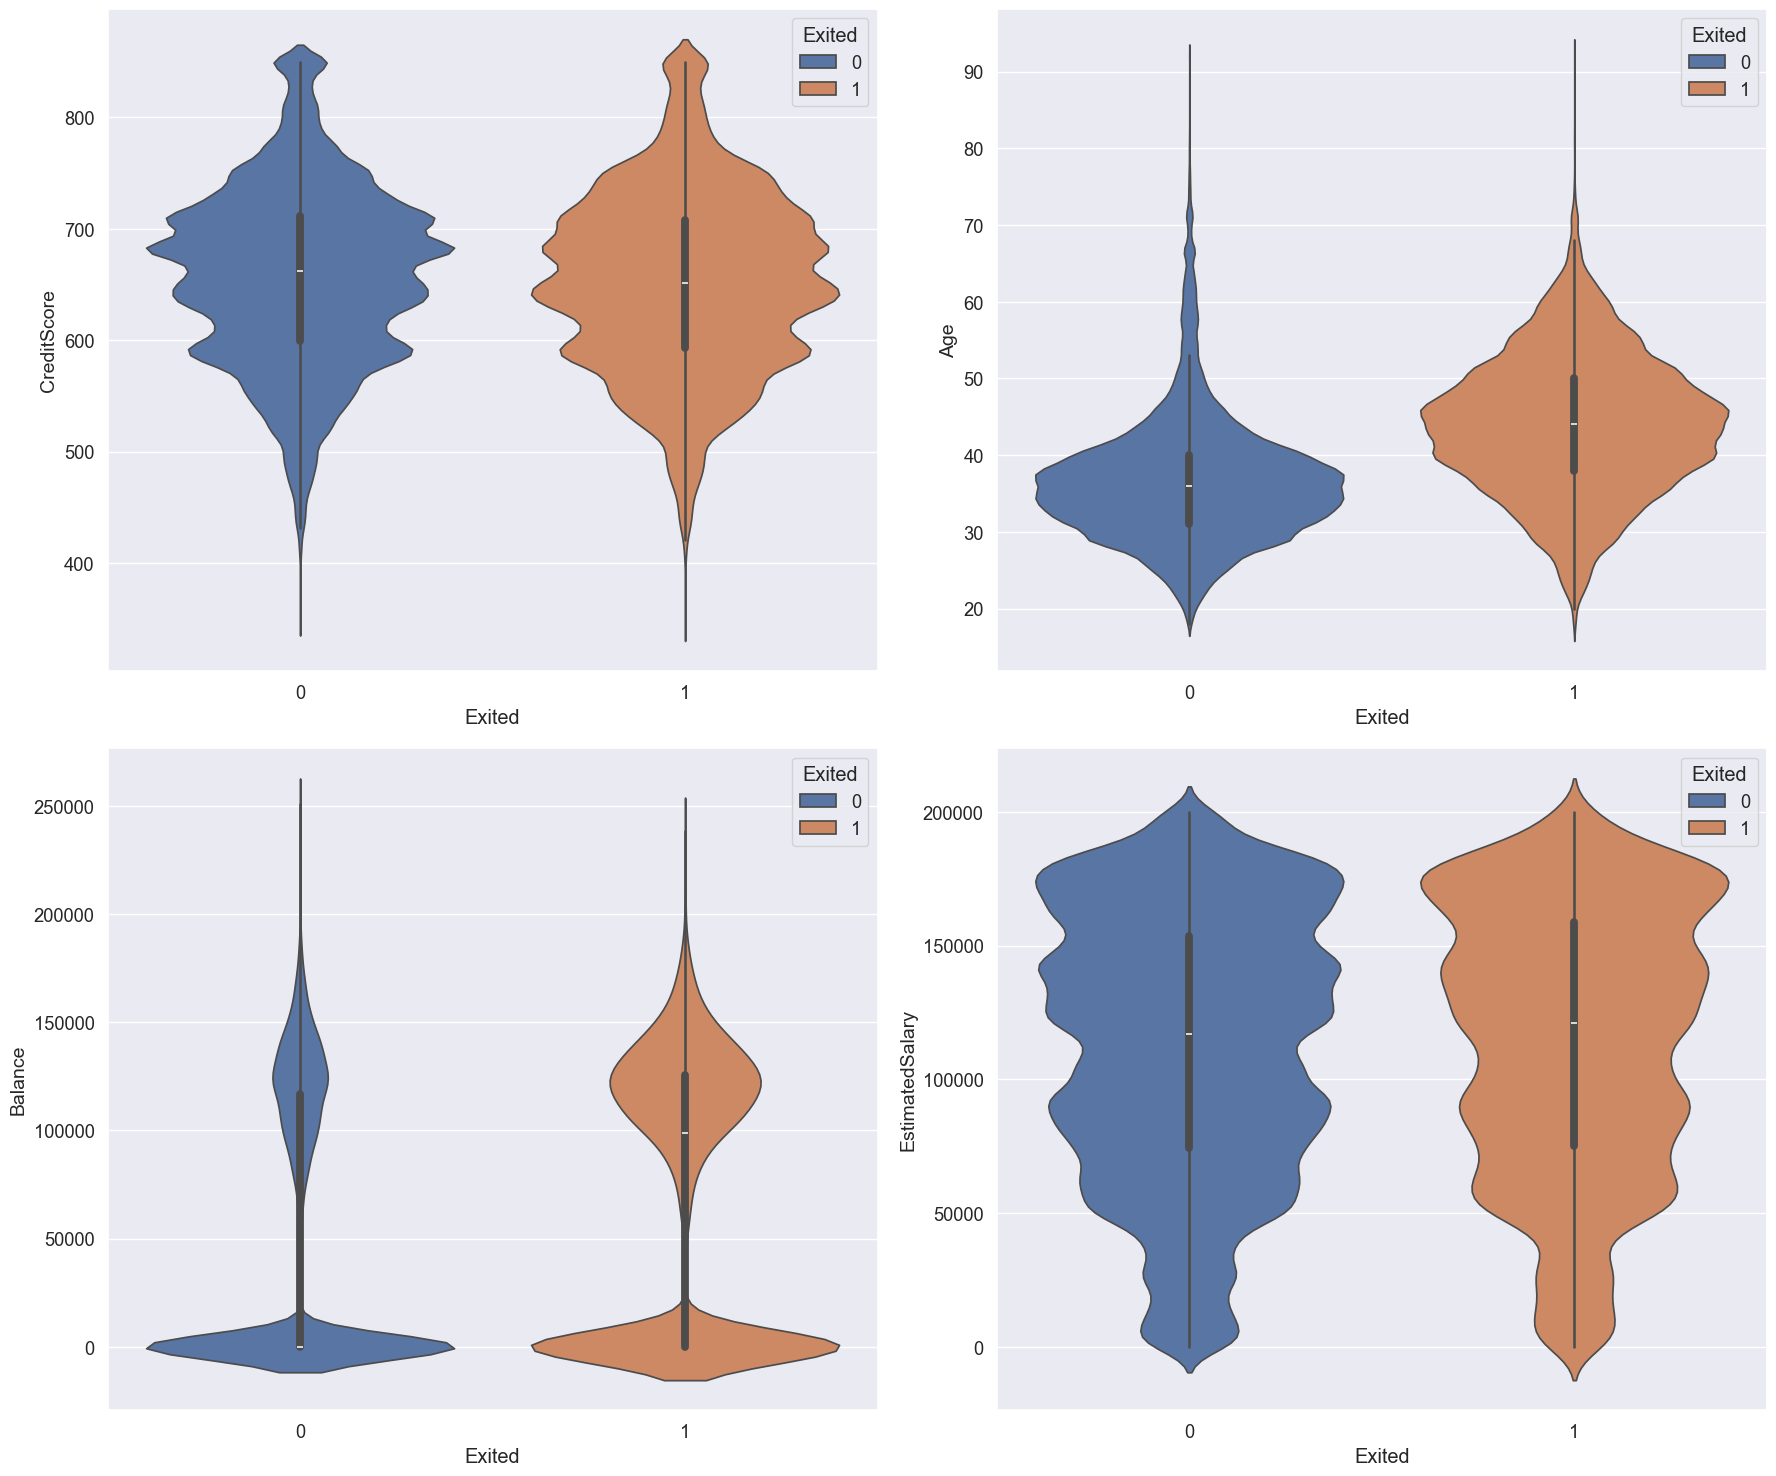

In [37]:
plt.figure(figsize=(18,15)) 
i = 1 # counter

for column in continuous_cols: # iteration of columns / acessing the columns from count     
    plt.subplot(2,2,i) 
    sns.violinplot(x=Target, y=column, data=data,hue=Target)
    plt.ylabel(column,fontsize=14) 
    plt.xlabel(Target)
    i+=1 # counter increment
    
plt.tight_layout()
plt.show() # used to hide the storage loction

* **Exploring the Relationship Between Categorical or Discrete Features and The Target** 



In [26]:
Target='Exited'

In [27]:
cat_dis_cols=categorical_cols+discrete_cols
len(cat_dis_cols)

7

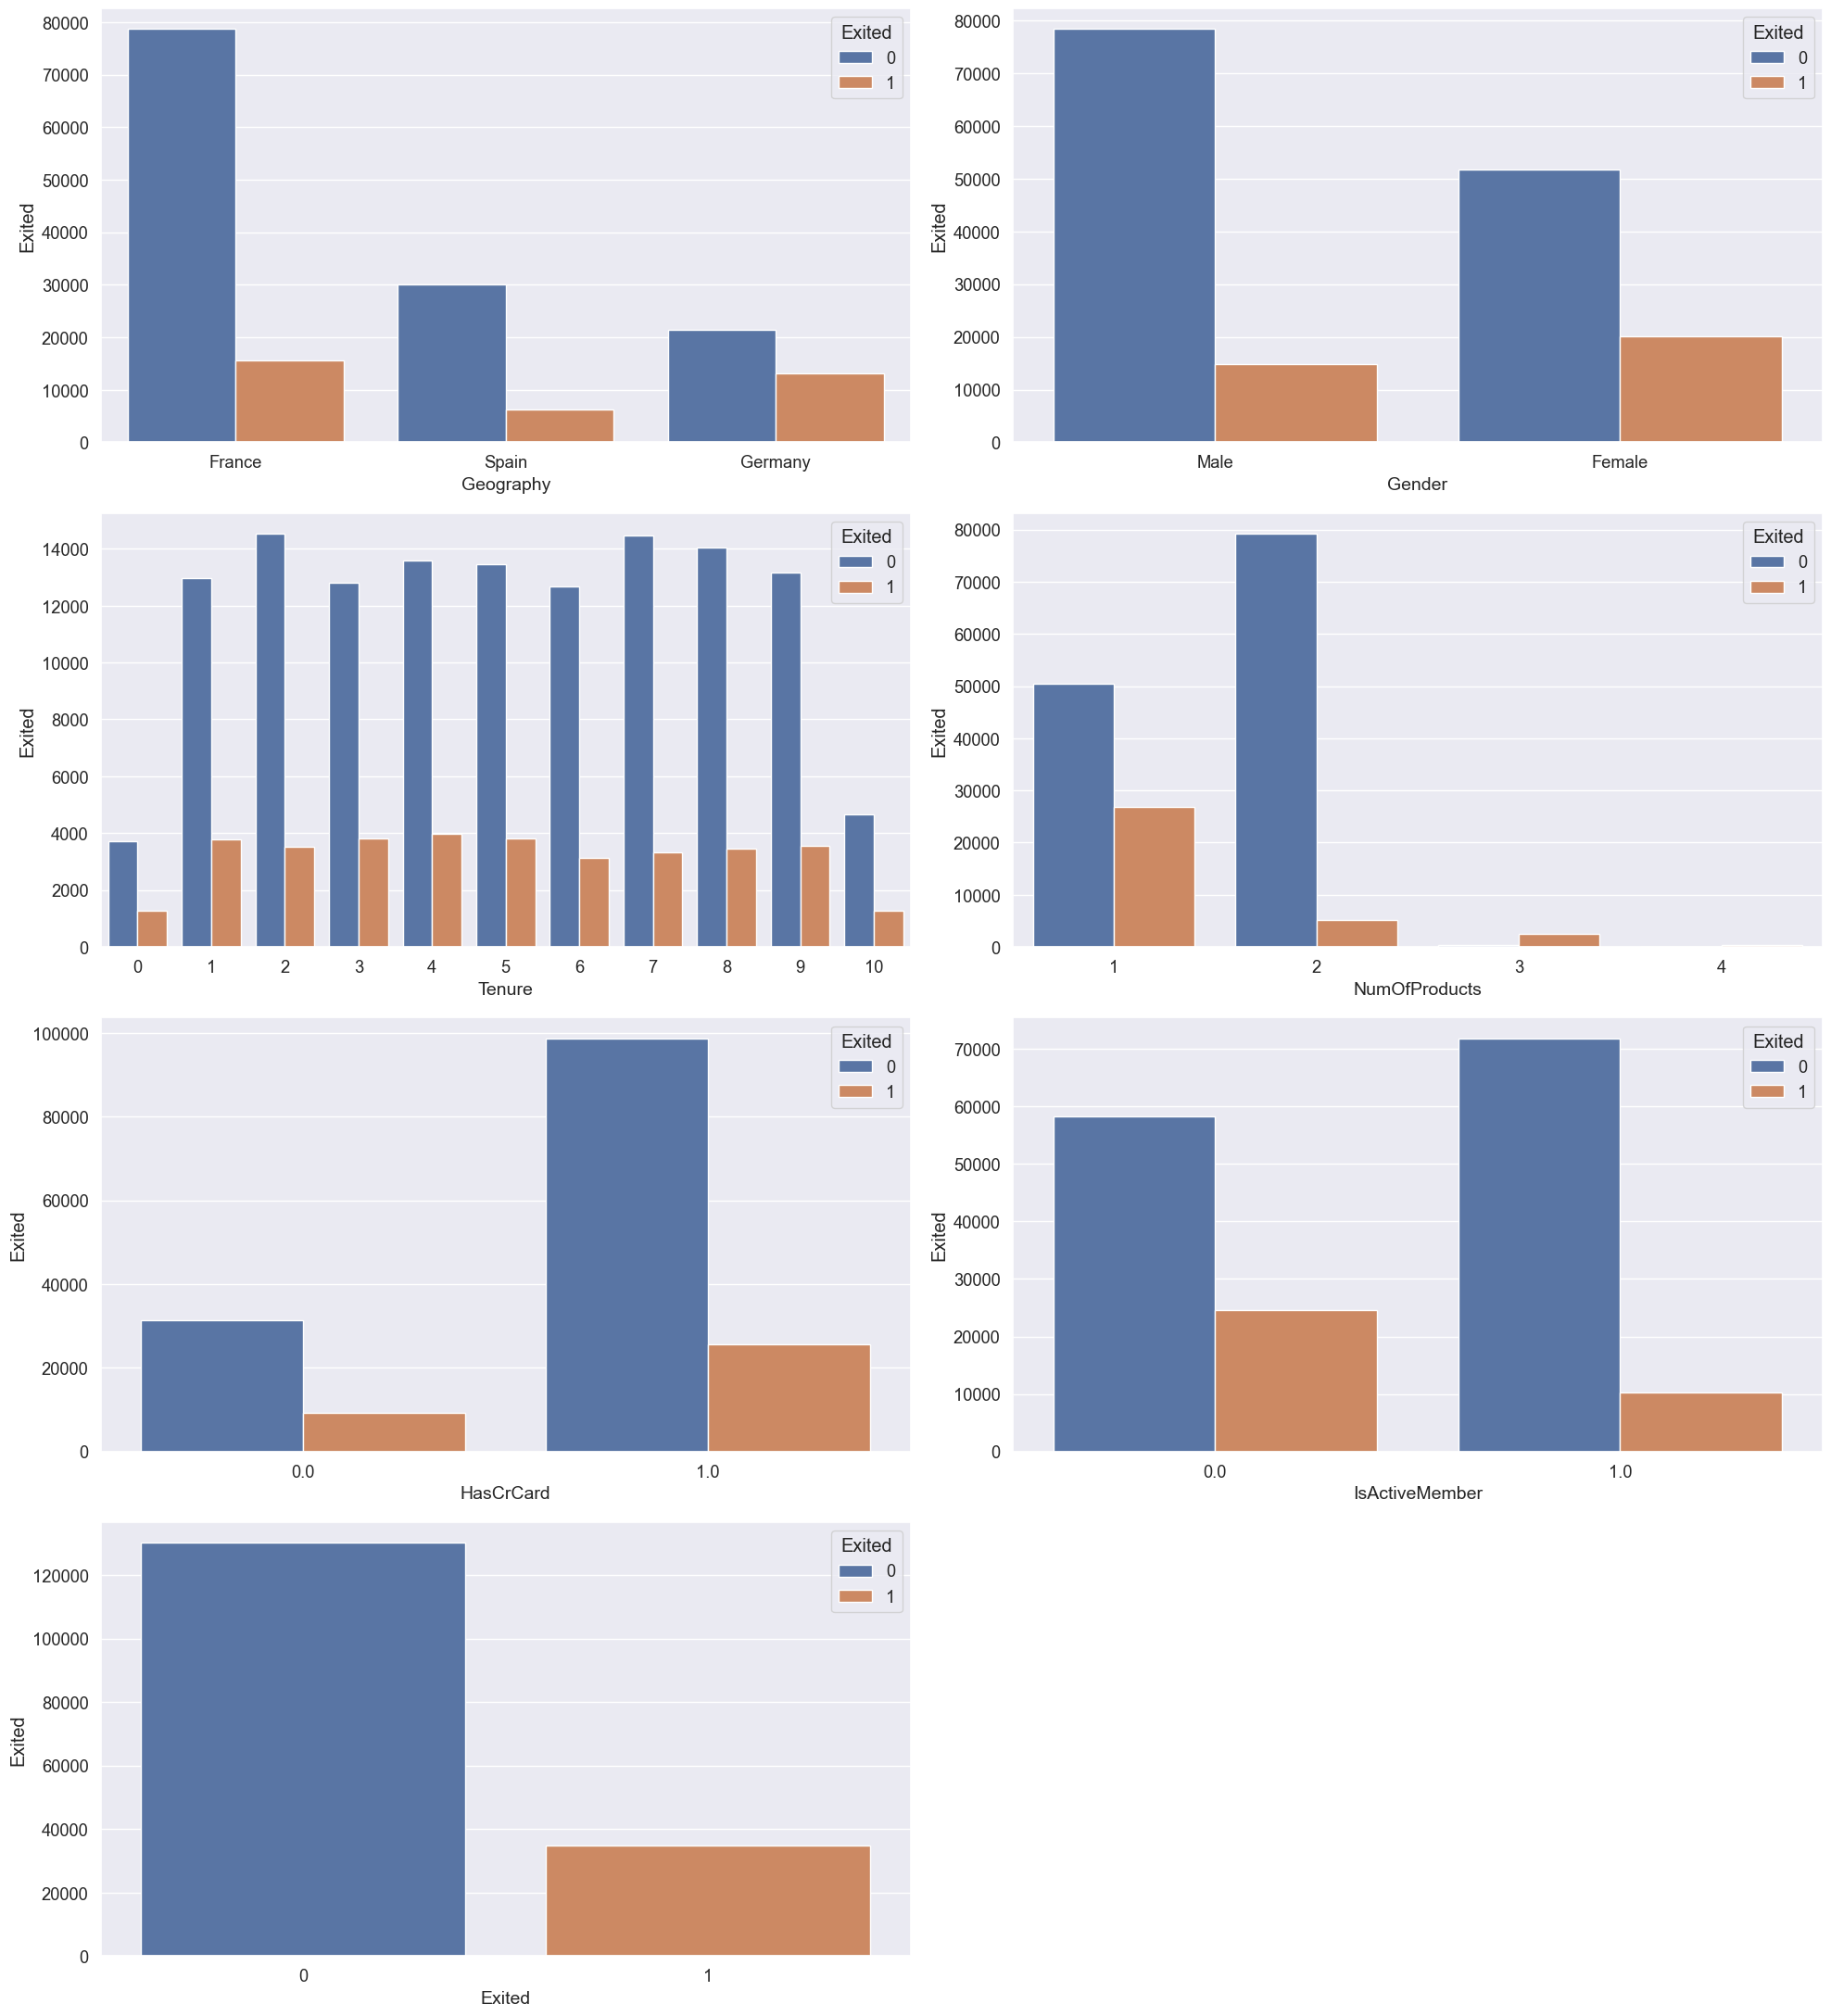

In [33]:
plt.figure(figsize=(20,22)) 
i = 1 # counter

for column in cat_dis_cols: # iteration of columns / acessing the columns from count     
    plt.subplot(4,2,i) 
    sns.countplot(x=data[column],hue=data[Target])
    plt.xlabel(column,fontsize=14) 
    plt.ylabel(Target)
    i+=1 # counter increment
    
plt.tight_layout()
plt.show() # used to hide the storage loction

# Multivariat Analysis 

In [29]:
Target='Exited'

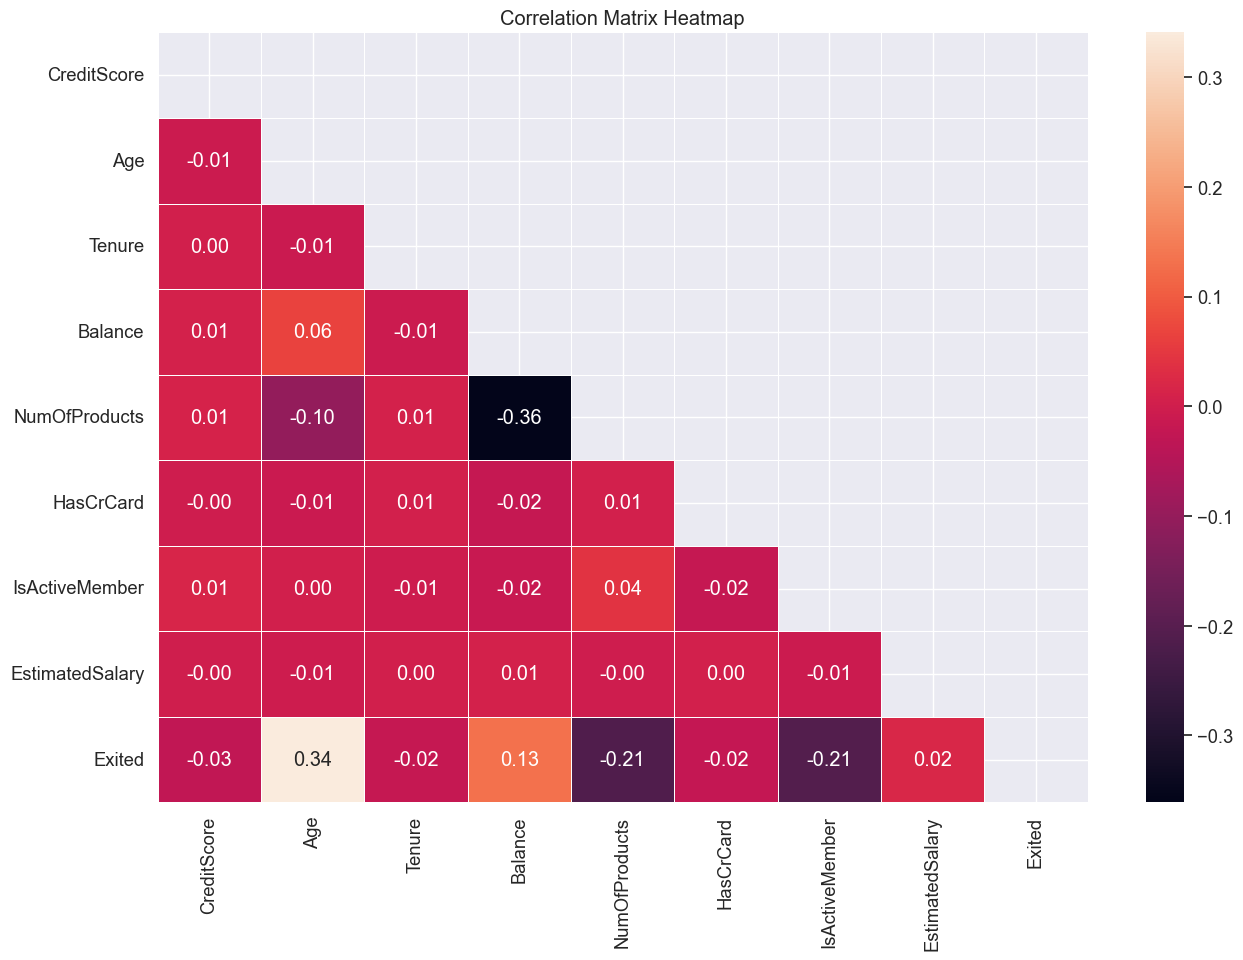

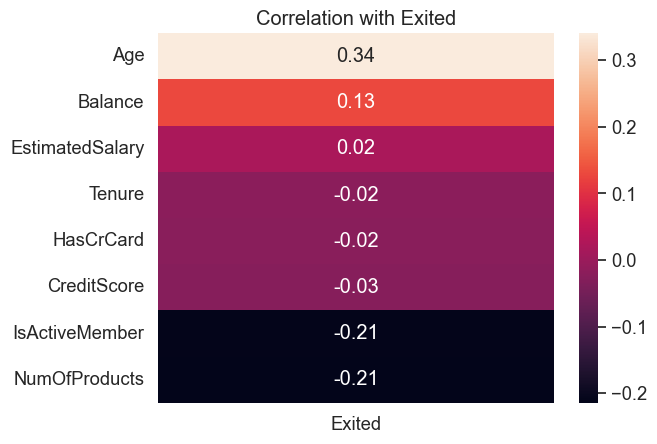

In [30]:
# Compute the correlation matrix
correlation_matrix = data[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Graph I.
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

sns.heatmap(correlation_matrix,mask = mask,annot=True, linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Graph II
 